In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import sys

path = 'G:\experiment data/b/'
save_path = 'G:\experiment data/a/'

file_list = os.listdir(path)

if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7']#, 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'] #라인 갯수

    load = data[:, 8:9]
    dis = data[:, 9:10]

    for i in range(0,8):
        y[i] = data[:, i:i+1]

    num = np.shape(data)[0]
    x = np.arange(num)

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    for i in range(0, 8):
        ax1.plot(x, y[i], label=i + 1, linewidth=0.1)


    ax2.plot(x, load)
    ax2.plot(x, dis)
    ax1.set_ylabel('Sample Voltage')
    ax2.set_ylabel('Load - Displacement')
    ax1.set_xlabel('Time')
    ax1.set_ylim(4, 6)
    ax2.set_ylim(-10, 0)
    ax1.set_ylim()
    # ax1.set_xlim(-100000,1400000)

    plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
    print(file_name, "완료!")
    plt.close(fig)

print('최종 끝')

1_1.csv 완료!
1_10.csv 완료!
1_11.csv 완료!
1_12.csv 완료!
1_13.csv 완료!
1_14.csv 완료!
1_15.csv 완료!
1_16.csv 완료!
1_17.csv 완료!
1_18.csv 완료!
1_19.csv 완료!
1_2.csv 완료!
1_20.csv 완료!
1_3.csv 완료!
1_4.csv 완료!
1_5.csv 완료!
1_6.csv 완료!
1_7.csv 완료!
1_8.csv 완료!
1_9.csv 완료!
최종 끝


1.csv 시작!
끄으으으으으으으읕


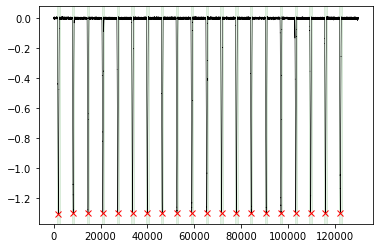

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import sys
import glob

##################################################
path = 'G:\experiment data/a/'
save_path = 'G:\experiment data/b/'
rate = 500 #받는속도
range_front =  500 # 피크 앞뒤로 짜를 갯수
range_back = 500#
term = 10 #중간에 몇초쉬었는지
##################################################


file_list = os.listdir(path)
count = 1
if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    load = data[:, 8:9]
    dis = data[:, 9:10]
    x = np.arange(np.shape(load)[0])
    block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    peaks, _ = find_peaks(block, distance= term*rate) #peak 받아냄
    peaks = np.delete(peaks,-1) #거리로하다보면 마지막 요소 생기는데 이거 삭제

    for i in peaks[0:len(peaks)]: # 첫번째 그래프빼고싶으면 1:len~~
        plt.axvspan(i - range_front, i + range_back, alpha=0.1, color='green')
        result = data[i-range_front:i+range_back+1 ,:]
        np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e')
        count += 1
    plt.plot(block*-1,c = 'black', linewidth=0.5)
    plt.plot(peaks, block[peaks]*-1, "x", c='red')
    plt.savefig(save_path+file_name.split('.')[0]+'check.png', dpi=300)
print('끄으으으으으으으읕')

In [23]:
from scipy.signal import savgol_filter
import numpy as np
np.set_printoptions(precision=2)  # For compact display.
x = np.array([[2, 2, 5, 2, 1, 0, 1, 4, 9],[4,5,7,8,9,0,3,4,5]])
savgol_filter(x, 5, 2)

array([[1.66, 3.17, 3.54, 2.86, 0.66, 0.17, 1.  , 4.  , 9.  ],
       [3.86, 5.37, 6.74, 8.94, 6.26, 3.09, 1.63, 2.51, 5.97]])

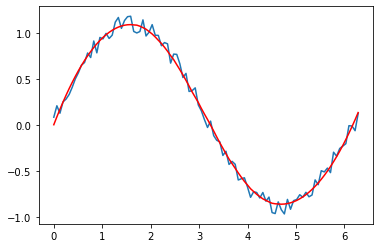

In [19]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = scipy.signal.savgol_filter(y, 51, 2) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import savgol_filter

################path:엑셀파일 저장된 경로 , save_path: 그래프저장할경로, 그래프로 표시할 라인갯수#################################
path = 'E:/abcd/'
save_path = 'E:/abcd/'
line_num = 16
filter_scale = 203
order = 1
########################################################################################################################


y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'][0:line_num]
file_list = os.listdir(path)
if not file_list:
    print('경로확인, 경로 지정안되었습니다.')
    sys.exit()
for file_name in file_list:
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
        data = np.array(df)

        if line_num+2 == data.shape[1]:
            pass
        else:
            print('line 갯수를 확인해야합니다.\n 시스템을 종료합니다')
            sys.exit()

        save_data = []
        load = data[:, len(y):len(y)+1]
        dis = data[:, len(y)+1:len(y)+2]

        num = np.shape(data)[0]
        x = np.arange(num)
        # if num%2==0:
        #     win_length = num-1
        # else:
        #     win_length = len(y[i])

        # fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()
        y[0] = savgol_filter(y[0].flatten(),filter_scale,order)
        save_data=y[0]

        for i in range(1, len(y)):
            y[i] = data[:, i:i + 1]
            # y[i] = savgol_filter(y[i].flatten(),win_length,1)
            y[i] = savgol_filter(y[i].flatten(),101,1)
            np.vstack((save_data, y[i]))
        #     ax1.plot(x, y[i], label=i + 1, linewidth=0.1)
        np.vstack((save_data,load))
        np.vstack((save_data,dis))
        np.savetxt(save_path + '/' + file_name + '.csv', save_data.T, delimiter='\t')

        # ax2.plot(x, load)
        # ax2.plot(x, dis)

        # ##그래프 설정 파트 #################################################
        # ax1.set_ylabel('Sample Voltage') #y1축 이름
        # ax2.set_ylabel('Load - Displacement') #y2축 이름
        # ax1.set_xlabel('Time')    # x 축 이름
        # ax1.set_ylim(6.8, 6.975)        #y축 스케일조절
        # ax2.set_ylim(-10, 0)      #y2축 스케일조절
        # # ax1.set_xlim(0,400)  # x축 스케일 조절
        #
        # plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
        # print(file_name, "완료!")
        # plt.close(fig)


print('최종 끝')

(17,17)_9.csv 완료!
최종 끝


In [13]:
print(len(y[0]))
y[0].flatten()

6000


array([6.92 , 6.922, 6.921, ..., 6.924, 6.923, 6.923])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import savgol_filter

################path:엑셀파일 저장된 경로 , save_path: 그래프저장할경로, 그래프로 표시할 라인갯수#################################
path = 'E:/abcd/'
save_path = 'E:/abcd/'
line_num = 16
filter_scale = 203
order = 1
########################################################################################################################


y = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15'][0:line_num]
file_list = os.listdir(path)
if not file_list:
    print('경로확인, 경로 지정안되었습니다.')
    sys.exit()
for file_name in file_list:
    if file_name.endswith(".csv"):
        df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
        data = np.array(df)

        if line_num+2 == data.shape[1]:
            pass
        else:
            print('line 갯수를 확인해야합니다.\n 시스템을 종료합니다')
            sys.exit()

        save_data = []
        load = data[:, len(y):len(y)+1]
        dis = data[:, len(y)+1:len(y)+2]

        num = np.shape(data)[0]
        x = np.arange(num)
        # if num%2==0:
        #     win_length = num-1
        # else:
        #     win_length = len(y[i])

        # fig, ax1 = plt.subplots()
        # ax2 = ax1.twinx()
        y[0] = savgol_filter(y[0].flatten(),filter_scale,order)
        save_data=y[0]

        for i in range(1, len(y)):
            y[i] = data[:, i:i + 1]
            # y[i] = savgol_filter(y[i].flatten(),win_length,1)
            y[i] = savgol_filter(y[i].flatten(),101,1)
            np.vstack((save_data, y[i]))
        #     ax1.plot(x, y[i], label=i + 1, linewidth=0.1)
        np.vstack((save_data,load))
        np.vstack((save_data,dis))
        np.savetxt(save_path + '/' + file_name + '.csv', save_data.T, delimiter='\t')

        # ax2.plot(x, load)
        # ax2.plot(x, dis)

        # ##그래프 설정 파트 #################################################
        # ax1.set_ylabel('Sample Voltage') #y1축 이름
        # ax2.set_ylabel('Load - Displacement') #y2축 이름
        # ax1.set_xlabel('Time')    # x 축 이름
        # ax1.set_ylim(6.8, 6.975)        #y축 스케일조절
        # ax2.set_ylim(-10, 0)      #y2축 스케일조절
        # # ax1.set_xlim(0,400)  # x축 스케일 조절
        #
        # plt.savefig(save_path + '/' + file_name + '.png', dpi=300)
        # print(file_name, "완료!")
        # plt.close(fig)


print('최종 끝')